<a href="https://colab.research.google.com/github/LeonGoergen/informationExtraction/blob/main/data_prep/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from tqdm import tqdm
import json
import unicodedata
import os
from collections import Counter

# Data Preparation

In [ ]:
def read_conll_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    sentences = []
    sentence = []

    for line in lines:
        if line.strip() == "":
            # End of a sentence
            if sentence:
                sentences.append(sentence)
                sentence = []
        else:
            word, tag = line.strip().split()
            sentence.append((word, tag))

    if sentence:
        sentences.append(sentence)

    return sentences

In [ ]:
def create_dataframe(filepath, court, start_sent_id=0):
    sentences = read_conll_file(filepath)

    rows = []
    current_sent_id = start_sent_id
    for sent in sentences:
        for word, tag in sent:
            rows.append((word, tag, current_sent_id, court))
        current_sent_id += 1

    df = pd.DataFrame(rows, columns=['Word', 'Tag', 'Sentence', 'Court'])
    return df, current_sent_id

start_sent_id = 0

df_bag, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bag.conll', 'bag', start_sent_id)
df_bfh, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bfh.conll', 'bfh', start_sent_id)
df_bgh, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bgh.conll', 'bgh', start_sent_id)
df_bpatg, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bpatg.conll', 'bpatg', start_sent_id)
df_bsg, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bsg.conll', 'bsg', start_sent_id)
df_bverfg, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bverfg.conll', 'bverfg', start_sent_id)
df_bverwg, start_sent_id = create_dataframe('/content/drive/MyDrive/Masterarbeit/Datasets/bverwg.conll', 'bverwg', start_sent_id)

all_df = pd.concat([df_bag, df_bfh, df_bgh, df_bpatg, df_bsg, df_bverfg, df_bverwg])
all_df

,Word,Tag,Sentence,Court
0,Prozesskostenhilfe,O,0,bag
1,-,O,0,bag
2,Entschädigung,O,0,bag
3,für,O,0,bag
4,überlange,O,0,bag
...,...,...,...,...
347819,1,I-GS,66722,bverwg
347820,Satz,I-GS,66722,bverwg
347821,1,I-GS,66722,bverwg
347822,WBO,I-GS,66722,bverwg


In [ ]:
tag_counts = all_df['Tag'].str.replace(r'(B-|I-)', '', regex=True).value_counts()
tag_counts = tag_counts[tag_counts.index != 'O']
tag_counts

,count
Tag,
RS,194601
GS,116934
LIT,38119
VT,15227
EUN,12520
INN,6872
GRT,5981
VO,5238
VS,4702


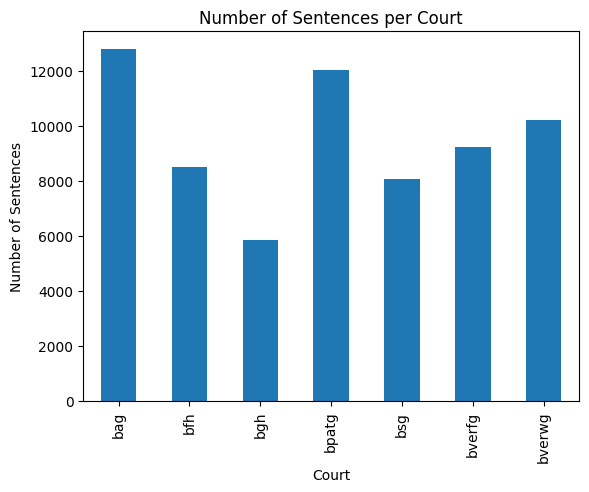

In [ ]:
all_df.groupby('Court')['Sentence'].nunique().plot(kind='bar')
plt.xlabel('Court')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences per Court')
plt.show()

In [ ]:
sentence_tags = all_df[all_df['Sentence'] == 15]['Tag'].tolist()
sentence_words = all_df[all_df['Sentence'] == 15]['Word'].tolist()
print(sentence_tags)
print(sentence_words)
print(' '.join(sentence_words))

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'O', 'B-GS', 'I-GS', 'I-GS', 'I-GS', 'I-GS', 'O', 'B-EUN', 'I-EUN', 'I-EUN', 'I-EUN', 'I-EUN', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'I-RS', 'O', 'O', 'O']
['b', ')', 'Die', 'Angemessenheit', 'der', 'Verfahrensdauer', 'ist', 'dabei', 'stets', 'im', 'Lichte', 'der', 'aus', 'Art.', '2', 'Abs.', '1', 'iVm.', 'Art.', '20', 'Abs.', '3', 'GG', 'und', 'Art.', '19', 'Abs.', '4', 'GG', 'sowie', 'Art.', '6', 'Abs.', '1', 'EMRK', 'folgenden', 'Verpflichtung', 'des', 'Staates', ',', 'Gerichtsverfahren', 'in', 'angemessener', 'Zeit', 'zum', 'Abschluss', 'zu', 'bringen', ',', 'zu', 'beurteilen', '(', 'BGH', '13.', 'Februar', '2014', '-', 'III', 'ZR', '311/13', '-', 'Rn.', '27', 'mwN', ')', '.']
b ) Die Angemessenheit der Verfahrens

In [ ]:
def remove_duplicate_tags(df):
    cleaned_data = []

    for sentence_num in tqdm(df['Sentence'].unique(), desc="Processing sentences"):
        sentence_df = df[df['Sentence'] == sentence_num]
        tags = sentence_df['Tag'].tolist()

        seen_tags = set()
        has_duplicates = False

        for tag in tags:
            if tag.startswith('B-'):
                if tag in seen_tags:
                    has_duplicates = True
                    break
                seen_tags.add(tag)

        if not has_duplicates:
            cleaned_data.extend(sentence_df.values)

    cleaned_df = pd.DataFrame(cleaned_data, columns=df.columns)
    return cleaned_df

# Assuming all_df is your original DataFrame
cleaned_df = remove_duplicate_tags(all_df)

Processing sentences: 100%|██████████| 66723/66723 [07:41<00:00, 144.46it/s]


In [ ]:
print(f"removed sentences: {all_df['Sentence'].nunique() - cleaned_df['Sentence'].nunique()}")
print(f"percentage: {(all_df['Sentence'].nunique() - cleaned_df['Sentence'].nunique()) / all_df['Sentence'].nunique() * 100}%")

removed sentences: 9062
percentage: 13.581523612547397%


In [ ]:
def remove_o_only_sentences(df):
    cleaned_data = []

    for sentence_num in tqdm(df['Sentence'].unique(), desc="Processing sentences"):
        sentence_df = df[df['Sentence'] == sentence_num]
        tags = sentence_df['Tag'].tolist()

        if not all(tag == 'O' for tag in tags):
            cleaned_data.extend(sentence_df.values)

    no_o_df = pd.DataFrame(cleaned_data, columns=df.columns)
    return no_o_df

no_o_df = remove_o_only_sentences(cleaned_df)

Processing sentences: 100%|██████████| 57661/57661 [04:33<00:00, 210.50it/s]


In [ ]:
print(f"removed sentences: {cleaned_df['Sentence'].nunique() - no_o_df['Sentence'].nunique()}")
print(f"percentage: {(cleaned_df['Sentence'].nunique() - no_o_df['Sentence'].nunique()) / cleaned_df['Sentence'].nunique() * 100}%")

removed sentences: 36548
percentage: 63.384263193493005%


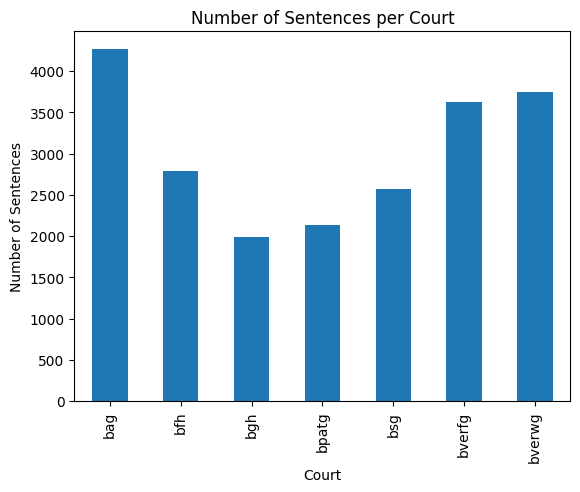

In [ ]:
no_o_df.groupby('Court')['Sentence'].nunique().plot(kind='bar')
plt.xlabel('Court')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences per Court')
plt.show()

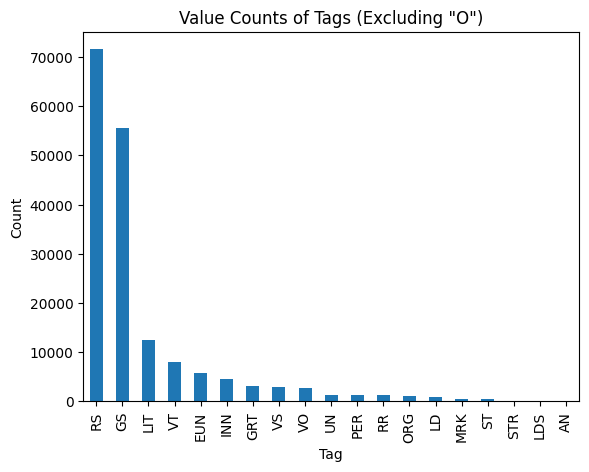

In [ ]:
tag_counts = no_o_df['Tag'].str.replace(r'(B-|I-)', '', regex=True).value_counts()
tag_counts = tag_counts[tag_counts.index != 'O']

tag_counts.plot(kind='bar')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.title('Value Counts of Tags (Excluding "O")')
plt.show()

**PER** - Person

**RR** - Judge

**AN** - Lawyer

**LD** - Country

**ST** - City

**STR** - Street

**LDS** - Landscape

**LOC** - Location

**ORG** - Organization

**UN** - Company

**INN** - Institution

**GRT** - Court

**MRK** - Brand

**GS** - Law

**VO** - Ordinance

**EUN** - EU legal norm

**NRM** - Legal norm

**VS** - Regulation

**VT** - Contract

**REG** - Case-by-c. regul.

**RS** - Court decision

**LIT** - Legal literature

In [ ]:
def create_sentence_dataframe(df):
  grouped = df.groupby(['Court', 'Sentence']).agg({
    'Word': list,
    'Tag': list,
  }).reset_index()

  new_df = pd.DataFrame({
      'tokens': grouped['Word'],
      'ner_tags': grouped['Tag'],
      'sentence': grouped['Sentence'],
      'court': grouped['Court'],
  })

  return new_df

sentence_df = create_sentence_dataframe(no_o_df)
sentence_df

,tokens,ner_tags,sentence,court
0,"[Der, Antrag, auf, Gewährung, von, Prozesskost...","[O, O, O, O, O, O, O, O, O, O, O, B-AN, O, O, ...",1,bag
1,"[Die, beabsichtigte, Klage, auf, Entschädigung...","[O, O, O, O, O, O, O, O, O, B-RS, I-RS, I-RS, ...",3,bag
2,"[Von, einer, unangemessenen, Verfahrensdauer, ...","[O, O, O, O, O, O, O, O, O, O, B-GS, I-GS, I-G...",4,bag
3,"[2., Die, Antragstellerin, hat, mit, Schriftsa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",7,bag
4,"[3., Nach, §, 198, Abs., 1, Satz, 1, GVG, wird...","[O, O, B-GS, I-GS, I-GS, I-GS, I-GS, I-GS, I-G...",8,bag
...,...,...,...,...
21108,"[Entsprechendes, hat, das, Bundesministerium, ...","[O, O, O, B-INN, I-INN, I-INN, I-INN, I-INN, I...",66708,bverwg
21109,"[c, ), Die, Hinzuziehung, eines, Bevollmächtig...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-G...",66709,bverwg
21110,"[Auch, das, gesamte, Verfahren, zur, Versetzun...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",66719,bverwg
21111,"[Unter, diesen, besonderen, ,, sich, von, dem,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",66721,bverwg


In [ ]:
question_mapping = {
    'PER': ['Wer ist die genannte Person?', 'Wie heißt die Person?', 'Welche Person wird hier erwähnt?'],
    'RR': ['Wer ist der Richter in diesem Fall?', 'Wie heißt der Richter?', 'Welcher Richter wird erwähnt?'],
    'AN': ['Wie heißt der Anwalt, der hier erwähnt wird?', 'Wer ist der Anwalt in diesem Fall?', 'Welcher Anwalt wird genannt?'],
    'LD': ['In welchem Land spielt sich das ab?', 'Wie heißt das Land, das erwähnt wird?', 'Welches Land wird hier genannt?'],
    'ST': ['Wie heißt die Stadt, um die es geht?', 'Welche Stadt wird erwähnt?', 'In welcher Stadt spielt sich das ab?'],
    'STR': ['Welche Straße wird hier genannt?', 'Wie heißt die Straße, die erwähnt wird?', 'In welcher Straße spielt sich das ab?'],
    'LDS': ['Was ist der Name der Landschaft, die erwähnt wird?', 'Wie heißt die genannte Landschaft?', 'Welche Landschaft wird erwähnt?'],
    'LOC': ['Welcher Ort wird in dem Text genannt?', 'Wie heißt der erwähnte Ort?', 'Welcher Ort wird hier erwähnt?'],
    'ORG': ['Wie heißt die Organisation, die hier erwähnt wird?', 'Welche Organisation wird genannt?', 'Was ist der Name der Organisation?'],
    'UN': ['Wie lautet der Name des Unternehmens in diesem Kontext?', 'Welches Unternehmen wird hier erwähnt?', 'Wie heißt das genannte Unternehmen?'],
    'INN': ['Wie heißt die Institution, die erwähnt wird?', 'Welche Institution wird genannt?', 'Was ist der Name der Institution?'],
    'GRT': ['Welches Gericht ist in diesem Fall involviert?', 'Wie heißt das genannte Gericht?', 'Welches Gericht wird hier erwähnt?'],
    'MRK': ['Was ist der Name der genannten Marke?', 'Welche Marke wird hier erwähnt?', 'Wie heißt die erwähnte Marke?'],
    'GS': ['Wie lautet der Name des Gesetzes, das hier erwähnt wird?', 'Welches Gesetz wird genannt?', 'Was ist der Name des erwähnten Gesetzes?'],
    'VO': ['Welche Verordnung wird in dem Text erwähnt?', 'Wie heißt die erwähnte Verordnung?', 'Welche Verordnung wird hier genannt?'],
    'EUN': ['Wie heißt die spezifische EU-Rechtsnorm, die hier angesprochen wird?', 'Welche EU-Rechtsnorm wird erwähnt?', 'Wie lautet der Name der EU-Rechtsnorm?'],
    'NRM': ['Welche Rechtsnorm wird in diesem Kontext genannt?', 'Wie heißt die erwähnte Rechtsnorm?', 'Welche Rechtsnorm wird hier erwähnt?'],
    'VS': ['Wie heißt die erwähnte Vorschrift?', 'Welche Vorschrift wird genannt?', 'Was ist der Name der Vorschrift?'],
    'VT': ['Welcher Vertrag wird hier genannt?', 'Wie lautet der Name des erwähnten Vertrages?', 'Welcher Vertrag wird erwähnt?'],
    'REG': ['Wie lautet die spezifische Verordnung in diesem Fall?', 'Welche Verordnung wird genannt?', 'Welche Verordnung gilt hier?'],
    'RS': ['Wie lautet die Gerichtsentscheidung, die hier erwähnt wird?', 'Welche Entscheidung des Gerichts wird genannt?', 'Welche Gerichtsentscheidung wird hier erwähnt?'],
    'LIT': ['Welche juristische Literatur wird in dem Text verwendet?', 'Welche Literatur wird erwähnt?', 'Was ist der Name der juristischen Literatur?']
}

In [ ]:
def create_qa_pairs(tokens, tags, sentence_id, question_mapping):
    qa_pairs = []
    current_answer = []
    current_start = None
    question = None
    answer_count = 1
    context = ' '.join(tokens)  # Create the context string

    for i, (token, tag) in enumerate(zip(tokens, tags)):
        if tag.startswith('B-'):
            if current_answer:
                qa_pairs.append({
                    'id': f"{sentence_id}-{answer_count}",
                    'tag': question,
                    'answers': {'answer_start': [current_start], 'text': [' '.join(current_answer)]},
                    'context': context,
                    'question': random.choice(question_mapping[question])
                })
                answer_count += 1
            current_answer = [token]
            current_start = context.find(token)  # Recalculate answer start
            question = tag[2:]
        elif tag.startswith('I-'):
            current_answer.append(token)
        else:
            if current_answer:
                qa_pairs.append({
                    'id': f"{sentence_id}-{answer_count}",
                    'tag': question,
                    'answers': {'answer_start': [current_start], 'text': [' '.join(current_answer)]},
                    'context': context,
                    'question': random.choice(question_mapping[question])
                })
                answer_count += 1
            current_answer = []
            current_start = None
            question = None

    if current_answer:
        qa_pairs.append({
            'id': f"{sentence_id}-{answer_count}",
            'tag': question,
            'answers': {'answer_start': [current_start], 'text': [' '.join(current_answer)]},
            'context': context,
            'question': random.choice(question_mapping[question])
        })

    return qa_pairs

sentence_df['qa_pairs'] = sentence_df.apply(lambda row: create_qa_pairs(row['tokens'], row['ner_tags'], row['sentence'], question_mapping), axis=1)
sentence_df

,tokens,ner_tags,sentence,court,qa_pairs
0,"[Der, Antrag, auf, Gewährung, von, Prozesskost...","[O, O, O, O, O, O, O, O, O, O, O, B-AN, O, O, ...",1,bag,"[{'id': '1-1', 'tag': 'AN', 'answers': {'answe..."
1,"[Die, beabsichtigte, Klage, auf, Entschädigung...","[O, O, O, O, O, O, O, O, O, B-RS, I-RS, I-RS, ...",3,bag,"[{'id': '3-1', 'tag': 'RS', 'answers': {'answe..."
2,"[Von, einer, unangemessenen, Verfahrensdauer, ...","[O, O, O, O, O, O, O, O, O, O, B-GS, I-GS, I-G...",4,bag,"[{'id': '4-1', 'tag': 'GS', 'answers': {'answe..."
3,"[2., Die, Antragstellerin, hat, mit, Schriftsa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",7,bag,"[{'id': '7-1', 'tag': 'GS', 'answers': {'answe..."
4,"[3., Nach, §, 198, Abs., 1, Satz, 1, GVG, wird...","[O, O, B-GS, I-GS, I-GS, I-GS, I-GS, I-GS, I-G...",8,bag,"[{'id': '8-1', 'tag': 'GS', 'answers': {'answe..."
...,...,...,...,...,...
21108,"[Entsprechendes, hat, das, Bundesministerium, ...","[O, O, O, B-INN, I-INN, I-INN, I-INN, I-INN, I...",66708,bverwg,"[{'id': '66708-1', 'tag': 'INN', 'answers': {'..."
21109,"[c, ), Die, Hinzuziehung, eines, Bevollmächtig...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-G...",66709,bverwg,"[{'id': '66709-1', 'tag': 'GS', 'answers': {'a..."
21110,"[Auch, das, gesamte, Verfahren, zur, Versetzun...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",66719,bverwg,"[{'id': '66719-1', 'tag': 'INN', 'answers': {'..."
21111,"[Unter, diesen, besonderen, ,, sich, von, dem,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",66721,bverwg,"[{'id': '66721-1', 'tag': 'GS', 'answers': {'a..."


In [ ]:
print(' '.join(sentence_df.iloc[1].tokens))
print(', '.join(sentence_df.iloc[1].ner_tags))
print(sentence_df.iloc[1].qa_pairs)

Die beabsichtigte Klage auf Entschädigung wegen der Dauer des Verfahrens vor dem Bundesarbeitsgericht zum Aktenzeichen - 8 AZR 418/15 - bietet keine hinreichende Aussicht auf Erfolg , § 114 Abs. 1 Satz 1 ZPO .
O, O, O, O, O, O, O, O, O, B-RS, I-RS, I-RS, I-RS, I-RS, I-RS, I-RS, I-RS, I-RS, I-RS, I-RS, O, O, O, O, O, O, O, B-GS, I-GS, I-GS, I-GS, I-GS, I-GS, I-GS, O
[{'id': '3-1', 'tag': 'RS', 'answers': {'answer_start': [62], 'text': ['Verfahrens vor dem Bundesarbeitsgericht zum Aktenzeichen - 8 AZR 418/15 -']}, 'context': 'Die beabsichtigte Klage auf Entschädigung wegen der Dauer des Verfahrens vor dem Bundesarbeitsgericht zum Aktenzeichen - 8 AZR 418/15 - bietet keine hinreichende Aussicht auf Erfolg , § 114 Abs. 1 Satz 1 ZPO .', 'question': 'Welche Entscheidung des Gerichts wird genannt?'}, {'id': '3-2', 'tag': 'GS', 'answers': {'answer_start': [184], 'text': ['§ 114 Abs. 1 Satz 1 ZPO']}, 'context': 'Die beabsichtigte Klage auf Entschädigung wegen der Dauer des Verfahrens vor dem Bu

In [ ]:
train, test = train_test_split(sentence_df, test_size=0.15, random_state=1)
len(train), len(test)

(17946, 3167)

In [ ]:
def count_tags(tags):
    tag_counter = Counter()
    for tag in tags:
        if tag.startswith('B-') or tag.startswith('I-'):
            tag = tag[2:]  # Remove 'B-' or 'I-'
        tag_counter[tag] += 1
    return tag_counter

In [ ]:
total_counts = Counter()
for tags in train['ner_tags']:
    total_counts.update(count_tags(tags))
sorted(total_counts.items(), key=lambda pair: pair[0])

[('AN', 94),
 ('EUN', 4827),
 ('GRT', 2736),
 ('GS', 47270),
 ('INN', 4006),
 ('LD', 834),
 ('LDS', 109),
 ('LIT', 10613),
 ('MRK', 351),
 ('O', 467497),
 ('ORG', 902),
 ('PER', 1109),
 ('RR', 1013),
 ('RS', 61290),
 ('ST', 352),
 ('STR', 138),
 ('UN', 1190),
 ('VO', 2089),
 ('VS', 2391),
 ('VT', 6663)]

In [ ]:
total_counts = Counter()
for tags in test['ner_tags']:
    total_counts.update(count_tags(tags))
sorted(total_counts.items(), key=lambda pair: pair[0])

[('AN', 7),
 ('EUN', 859),
 ('GRT', 417),
 ('GS', 8288),
 ('INN', 662),
 ('LD', 141),
 ('LDS', 17),
 ('LIT', 1874),
 ('MRK', 71),
 ('O', 83653),
 ('ORG', 177),
 ('PER', 203),
 ('RR', 204),
 ('RS', 10262),
 ('ST', 63),
 ('STR', 15),
 ('UN', 168),
 ('VO', 569),
 ('VS', 489),
 ('VT', 1302)]

In [ ]:
train_json = train.to_json(orient='records')
test_json = test.to_json(orient='records')

with open('/content/drive/MyDrive/Masterarbeit/Datasets/train.json', 'w') as f:
  f.write(train_json)

with open('/content/drive/MyDrive/Masterarbeit/Datasets/test.json', 'w') as f:
  f.write(test_json)

In [ ]:
tokens = []
for i in range(min(100, len(train))):
  tokens.extend(train.iloc[i]['tokens'])

joined_tokens = ' '.join(tokens)
print("avg char count: " + str(len(joined_tokens) / 100))
print(joined_tokens)

avg char count: 234.74
Die Schweizer Kinderrente wird als Kinderzuschuss zur Invaliditätsrente gezahlt und wird damit von Art. 77 der VO Nr. 1408/71 erfasst ( vgl. zur Einordnung als Zuschuss zur Rente die Antwort der Kommission vom 30. Oktober 2002 auf die schriftliche Anfrage E- 2779/02 , ABlEU C 92 E , S. 208 ; FG Hamburg , Urteil vom 28. Februar 2013 1 K 109/12 , Entscheidungen der Finanzgerichte 2013 , 1056 , Rz 33 ) . Eine in dieser Zuständigkeitsverteilung abweichende Regelung wie in § 162 Abs. 2 Satz 2 VwGO kennt die Wehrbeschwerdeordnung nicht . Auf Antrag des Klägers wird die Berufung gegen das seinem Prozessbevollmächtigten am 25. Oktober 2017 an Verkündungs statt zugestellte Urteil des 2. Senats des Saarländischen Anwaltsgerichtshofs zugelassen . Eine auf einen Vermögensteil beschränkte Universalsukzession kennt § 7 S 2 UmwVO - im Gegensatz zu den später in Kraft getretenen Regelungen des SpTrUG - noch nicht . 2. Von der Darstellung des Sachverhalts und einer weiteren Begrü

# for commercial providers

In [ ]:
train = pd.read_json('/content/drive/MyDrive/Masterarbeit/Datasets/train.json', orient='records')
train

,tokens,ner_tags,sentence,court,qa_pairs
0,"[Die, Schweizer, Kinderrente, wird, als, Kinde...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-EUN,...",21059,bfh,"[{'id': '21059-1', 'tag': 'EUN', 'answers': {'..."
1,"[Eine, in, dieser, Zuständigkeitsverteilung, a...","[O, O, O, O, O, O, O, O, B-GS, I-GS, I-GS, I-G...",65043,bverwg,"[{'id': '65043-1', 'tag': 'GS', 'answers': {'a..."
2,"[Auf, Antrag, des, Klägers, wird, die, Berufun...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",26537,bgh,"[{'id': '26537-1', 'tag': 'GRT', 'answers': {'..."
3,"[Eine, auf, einen, Vermögensteil, beschränkte,...","[O, O, O, O, O, O, O, B-VO, I-VO, I-VO, I-VO, ...",45263,bsg,"[{'id': '45263-1', 'tag': 'VO', 'answers': {'a..."
4,"[2., Von, der, Darstellung, des, Sachverhalts,...","[O, O, O, O, O, O, O, O, O, O, O, O, B-GS, I-G...",20028,bfh,"[{'id': '20028-1', 'tag': 'GS', 'answers': {'a..."
...,...,...,...,...,...
17941,"[Foto, des, Kontaktsockels, „, Waffle, Kelvin,...","[O, O, O, O, O, B-PER, O, O, O, O, O, O, O, O,...",37693,bpatg,"[{'id': '37693-1', 'tag': 'PER', 'answers': {'..."
17942,"[Auch, monokratische, Leitungsorgane, sind, da...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",56301,bverfg,"[{'id': '56301-1', 'tag': 'RS', 'answers': {'a..."
17943,"[Die, Jahresüberschüsse, 2005, und, 2006, seie...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",15582,bfh,"[{'id': '15582-1', 'tag': 'GS', 'answers': {'a..."
17944,"[Ein, Streit, über, verwaltungsverfahrensrecht...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",42239,bsg,"[{'id': '42239-1', 'tag': 'PER', 'answers': {'..."


In [ ]:
# prompt: show me a row in my dataframe where the qa_pais column contains "'LDS': ['Was ist der Name der Landschaft, die erwähnt wird?', 'Wie heißt die genannte Landschaft?', 'Welche Landschaft wird erwähnt?'],"

for index, row in train.iterrows():
  if "Was ist der Name der Landschaft, die erwähnt wird?" in str(row['qa_pairs']):
    print(row['qa_pairs'][2])
    break

## Open AI

In [ ]:
def normalize_text(text):
    return unicodedata.normalize('NFC', text)

def convert_to_openai_format(df):
    jsonl_data = []

    for index, row in df.iterrows():
        tokens = row['tokens']
        tags = row['ner_tags']
        content_text = " ".join(tokens)
        content_text = normalize_text(content_text)
        content_length = len(content_text)

        # Initialize variables for storing entity annotations
        current_tag = None
        start_offset = None
        entity_tokens = []
        annotations = {}
        current_position = 0

        # Iterate over tokens and tags
        for i, (token, tag) in enumerate(zip(tokens, tags)):
            token = normalize_text(token)  # Normalize token
            token_start_offset = current_position
            token_end_offset = token_start_offset + len(token)

            if tag.startswith('B-'):  # Begin a new entity
                if current_tag is not None:
                    annotations.setdefault(current_tag, []).append(" ".join(entity_tokens))  # Append previous entity

                current_tag = tag[2:]  # Start a new tag
                entity_tokens = [token]  # Reset tokens for the new entity
                start_offset = token_start_offset

            elif tag.startswith('I-') and current_tag:  # Continue the current entity
                if current_tag != tag[2:]:
                    raise ValueError("Inconsistent tags in sequence.")
                entity_tokens.append(token)

            elif tag == 'O':  # Outside of any entity
                if current_tag is not None:
                    annotations.setdefault(current_tag, []).append(" ".join(entity_tokens))  # Append the entity
                    current_tag = None
                    entity_tokens = []
                    start_offset = None

            current_position = token_end_offset + 1  # Move to the next token (considering a space)

        # Add the last entity if it exists
        if current_tag is not None:
            annotations.setdefault(current_tag, []).append(" ".join(entity_tokens))

        # Prepare the "completion" part
        completion_lines = []
        for label, entities in annotations.items():
            for entity in entities:
                completion_lines.append(f"{label}:[\'{entity}\']")

        # Append "END" to signify the end of the completion
        completion_text = "\n".join(completion_lines) + " END"

        # Create the final JSON structure for this row
        jsonl_data.append({
            "prompt": f"{content_text}\n\n###\n\n",
            "completion": f" {completion_text}"
        })

    jsonl_data.append({
        "prompt": "\n\n###\n\n",
        "completion": "END"
    })

    return jsonl_data

In [ ]:
jsonl_output = convert_to_openai_format(train)

with open('output_openai.jsonl', 'w', encoding='utf-8') as f:
    for entry in jsonl_output:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")

In [ ]:
!sed -n '6225p' output_openai.jsonl

{"prompt": "Die Teilnahme aller Betriebe an der Finanzierung der Klägerin sorgt für die finanzielle Basis , die es ihr ermöglicht , ihrem in § 2 TV AKS 2012 und TV AKS 2014 definierten Gesellschaftszweck entsprechend Zuschüsse an die ausbildenden Betriebe zu zahlen .\n\n###\n\n", "completion": " VT:['§ 2 TV AKS 2012 und TV AKS 2014'] END"}


In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
import os
os.environ['OPENAI_API_KEY'] = 'xxxxx'

In [ ]:
!openai tools fine_tunes.prepare_data -f /content/output_openai.jsonl -q

Analyzing...

- Your file contains 17947 prompt-completion pairs
- There are 1802 duplicated prompt-completion sets. These are rows: [304, 476, 553, 603, 609, 650, 660, 827, 901, 949, 950, 974, 1042, 1059, 1130, 1249, 1272, 1324, 1347, 1382, 1441, 1454, 1470, 1505, 1518, 1520, 1524, 1616, 1619, 1636, 1712, 1751, 1796, 1800, 1824, 1874, 1918, 1930, 1937, 1959, 1966, 1973, 1981, 1991, 1992, 1998, 2019, 2025, 2051, 2056, 2059, 2073, 2102, 2117, 2127, 2128, 2153, 2155, 2168, 2232, 2245, 2247, 2265, 2271, 2318, 2359, 2385, 2420, 2427, 2485, 2492, 2494, 2498, 2500, 2513, 2530, 2538, 2551, 2587, 2609, 2611, 2631, 2645, 2679, 2681, 2705, 2723, 2743, 2755, 2779, 2785, 2789, 2797, 2865, 2899, 2905, 2918, 2986, 2988, 2995, 3003, 3029, 3041, 3044, 3046, 3087, 3097, 3117, 3140, 3143, 3150, 3152, 3157, 3165, 3187, 3218, 3220, 3245, 3249, 3267, 3276, 3311, 3332, 3335, 3348, 3389, 3415, 3439, 3444, 3449, 3451, 3465, 3501, 3507, 3510, 3520, 3528, 3555, 3561, 3567, 3586, 3595, 3669, 3686, 3690, 3704, 37

## SAP

In [ ]:
def normalize_text(text):
    return unicodedata.normalize('NFC', text)

def convert_to_sap_format(df):
    jsonl_data = []

    for index, row in df.iterrows():
        tokens = row['tokens']
        tags = row['ner_tags']
        content_text = " ".join(tokens)
        content_text = normalize_text(content_text)  # Normalize text
        content_length = len(content_text)

        annotations = []
        current_tag = None
        start_offset = None
        previous_end_offset = None
        current_position = 0

        for i, (token, tag) in enumerate(zip(tokens, tags)):
            token = normalize_text(token)  # Normalize token
            token_start_offset = current_position
            token_end_offset = token_start_offset + len(token)

            if tag.startswith('B-'):  # Begin a new entity
                if current_tag is not None:
                    # Check if previous_end_offset is within content length
                    if previous_end_offset > content_length:
                        raise ValueError(f"End offset {previous_end_offset} exceeds content length {content_length}.")

                    annotations.append([start_offset, previous_end_offset, current_tag])

                current_tag = tag[2:]
                start_offset = token_start_offset

            elif tag.startswith('I-') and current_tag:  # Continue the current entity
                if current_tag != tag[2:]:
                    raise ValueError("Inconsistent tags in sequence.")

            elif tag == 'O':  # Outside of any entity
                if current_tag is not None:
                    # Check if previous_end_offset is within content length
                    if previous_end_offset > content_length:
                        raise ValueError(f"End offset {previous_end_offset} exceeds content length {content_length}.")

                    annotations.append([start_offset, previous_end_offset, current_tag])
                    current_tag = None
                    start_offset = None

            previous_end_offset = token_end_offset
            current_position = token_end_offset + 1  # Move to the next token (considering a space)

        # Add the last annotation if it exists
        if current_tag is not None:
            # Check if the final end_offset is within content length
            if previous_end_offset > content_length:
                raise ValueError(f"End offset {previous_end_offset} exceeds content length {content_length}.")

            annotations.append([start_offset, previous_end_offset, current_tag])

        # Create the final JSON structure for this row
        jsonl_data.append({
            "id": index + 1,
            "text": content_text,
            "labels": annotations,
        })

    return jsonl_data

In [ ]:
jsonl_output = convert_to_sap_format(train)

# Save to a JSONL file if needed
with open('output_sap.jsonl', 'w', encoding='utf-8') as f:
    for entry in jsonl_output:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")

In [ ]:
!sed -n '6225p' output_sap.jsonl

{"id": 6225, "text": "Die Teilnahme aller Betriebe an der Finanzierung der Klägerin sorgt für die finanzielle Basis , die es ihr ermöglicht , ihrem in § 2 TV AKS 2012 und TV AKS 2014 definierten Gesellschaftszweck entsprechend Zuschüsse an die ausbildenden Betriebe zu zahlen .", "labels": [[129, 160, "VT"]]}


## Vertex AI

In [ ]:
def normalize_text(text):
    return unicodedata.normalize('NFC', text)

def convert_to_vertex_format(df):
    jsonl_data = []

    for index, row in df.iterrows():
        tokens = row['tokens']
        tags = row['ner_tags']
        content_text = " ".join(tokens)
        content_text = normalize_text(content_text)  # Normalize text
        content_length = len(content_text)

        annotations = []
        current_tag = None
        start_offset = None
        previous_end_offset = None
        current_position = 0

        for i, (token, tag) in enumerate(zip(tokens, tags)):
            token = normalize_text(token)  # Normalize token
            token_start_offset = current_position
            token_end_offset = token_start_offset + len(token)

            if tag.startswith('B-'):  # Begin a new entity
                if current_tag is not None:
                    # Check if previous_end_offset is within content length
                    if previous_end_offset > content_length:
                        raise ValueError(f"End offset {previous_end_offset} exceeds content length {content_length}.")

                    annotations.append({
                        "displayName": current_tag,
                        "startOffset": start_offset,
                        "endOffset": previous_end_offset
                    })

                current_tag = tag[2:]
                start_offset = token_start_offset

            elif tag.startswith('I-') and current_tag:  # Continue the current entity
                if current_tag != tag[2:]:
                    raise ValueError("Inconsistent tags in sequence.")

            elif tag == 'O':  # Outside of any entity
                if current_tag is not None:
                    # Check if previous_end_offset is within content length
                    if previous_end_offset > content_length:
                        raise ValueError(f"End offset {previous_end_offset} exceeds content length {content_length}.")

                    annotations.append({
                        "displayName": current_tag,
                        "startOffset": start_offset,
                        "endOffset": previous_end_offset
                    })
                    current_tag = None
                    start_offset = None

            previous_end_offset = token_end_offset
            current_position = token_end_offset + 1  # Move to the next token (considering a space)

        # Add the last annotation if it exists
        if current_tag is not None:
            # Check if the final end_offset is within content length
            if previous_end_offset > content_length:
                raise ValueError(f"End offset {previous_end_offset} exceeds content length {content_length}.")

            annotations.append({
                "displayName": current_tag,
                "startOffset": start_offset,
                "endOffset": previous_end_offset
            })

        # Create the final JSON structure for this row
        jsonl_data.append({
            "textContent": content_text,
            "textSegmentAnnotations": annotations,
        })

    return jsonl_data

In [ ]:
jsonl_output = convert_to_vertex_format(train)

# Save to a JSONL file if needed
with open('output.jsonl', 'w', encoding='utf-8') as f:
    for entry in jsonl_output:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")

In [ ]:
!sed -n '6225p' output.jsonl

{"textContent": "Die Teilnahme aller Betriebe an der Finanzierung der Klägerin sorgt für die finanzielle Basis , die es ihr ermöglicht , ihrem in § 2 TV AKS 2012 und TV AKS 2014 definierten Gesellschaftszweck entsprechend Zuschüsse an die ausbildenden Betriebe zu zahlen .", "textSegmentAnnotations": [{"displayName": "VT", "startOffset": 129, "endOffset": 160}]}


## AWS Comprehend

In [ ]:
import csv
import unicodedata

def normalize_text(text):
    return unicodedata.normalize('NFC', text)

def convert_to_aws_comprehend_format(df):
    documents = []
    annotations = []

    for line_number, row in df.iterrows():
        tokens = row['tokens']
        tags = row['ner_tags']
        content_text = " ".join(tokens)
        content_text = normalize_text(content_text)  # Normalize text

        documents.append(content_text)

        current_tag = None
        start_offset = None
        current_position = 0

        for i, (token, tag) in enumerate(zip(tokens, tags)):
            token = normalize_text(token)  # Normalize token
            token_start_offset = current_position
            token_end_offset = token_start_offset + len(token)

            if tag.startswith('B-'):  # Begin a new entity
                if current_tag is not None:
                    # Append the last entity before starting a new one
                    annotations.append(["documents.txt", line_number, start_offset, previous_end_offset, current_tag])

                current_tag = tag[2:]  # Extract the entity type (e.g., "IS" from "B-IS")
                start_offset = token_start_offset

            elif tag.startswith('I-') and current_tag:  # Continue the current entity
                if current_tag != tag[2:]:
                    raise ValueError("Inconsistent tags in sequence.")

            elif tag == 'O':  # Outside of any entity
                if current_tag is not None:
                    # Append the entity before resetting
                    annotations.append(["documents.txt", line_number, start_offset, previous_end_offset, current_tag])
                    current_tag = None
                    start_offset = None

            previous_end_offset = token_end_offset
            current_position = token_end_offset + 1  # Move to the next token (considering a space)

        # Add the last annotation if it exists
        if current_tag is not None:
            annotations.append(["documents.txt", line_number, start_offset, previous_end_offset, current_tag])

    # Write the document to a text file
    with open('documents.txt', 'w', newline='') as doc_file:
        for document in documents:
            doc_file.write(document + "\n")

    # Write the annotations to a CSV file
    with open('annotations.csv', 'w', newline='') as anno_file:
        writer = csv.writer(anno_file)
        writer.writerow(["File", "Line", "Begin Offset", "End Offset", "Type"])  # Header
        writer.writerows(annotations)

# Example DataFrame
df = pd.DataFrame({
    "tokens": [["Die", "Schweizer", "Kinderrente", "wird", "als"]],
    "ner_tags": [["B-IS", "I-IS", "O", "B-TH", "O"]]
})

convert_to_aws_comprehend_format(train)

# Azure

In [ ]:
def normalize_text(text):
    return unicodedata.normalize('NFC', text)

def convert_to_azure_format(df, output_dir="azure_output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize the base JSON structure with the provided metadata
    json_data = {
        "projectFileVersion": "2022-05-01",
        "stringIndexType": "Utf16CodeUnit",
        "metadata": {
            "projectName": "nermasterproject",
            "storageInputContainerName": "nermasterblob",
            "projectKind": "CustomEntityRecognition",
            "language": "de",
            "multilingual": False,
            "settings": {}
        },
        "assets": {
            "projectKind": "CustomEntityRecognition",
            "entities": [
                {"category": "AN"},
                {"category": "EUN"},
                {"category": "GRT"},
                {"category": "GS"},
                {"category": "INN"},
                {"category": "LD"},
                {"category": "LDS"},
                {"category": "LIT"},
                {"category": "MRK"},
                {"category": "ORG"},
                {"category": "PER"},
                {"category": "RR"},
                {"category": "RS"},
                {"category": "ST"},
                {"category": "STR"},
                {"category": "UN"},
                {"category": "VO"},
                {"category": "VT"},
                {"category": "VS"}
            ],
            "documents": []
        }
    }

    for line_number, row in df.iterrows():
        tokens = row['tokens']
        tags = row['ner_tags']
        content_text = " ".join(tokens)
        content_text = normalize_text(content_text)  # Normalize text

        # Save document to a .txt file
        file_name = f"{str(line_number).zfill(2)}.txt"
        with open(os.path.join(output_dir, file_name), 'w') as text_file:
            text_file.write(content_text)

        entities = []
        current_tag = None
        start_offset = None
        current_position = 0

        for i, (token, tag) in enumerate(zip(tokens, tags)):
            token = normalize_text(token)  # Normalize token
            token_start_offset = current_position
            token_end_offset = token_start_offset + len(token)

            if tag.startswith('B-'):  # Begin a new entity
                if current_tag is not None:
                    # Append the last entity before starting a new one
                    entities.append({
                        "category": current_tag,
                        "offset": start_offset,
                        "length": previous_end_offset - start_offset
                    })

                current_tag = tag[2:]  # Extract the entity type (e.g., "IS" from "B-IS")
                start_offset = token_start_offset

            elif tag.startswith('I-') and current_tag:  # Continue the current entity
                if current_tag != tag[2:]:
                    raise ValueError("Inconsistent tags in sequence.")

            elif tag == 'O':  # Outside of any entity
                if current_tag is not None:
                    # Append the entity before resetting
                    entities.append({
                        "category": current_tag,
                        "offset": start_offset,
                        "length": previous_end_offset - start_offset
                    })
                    current_tag = None
                    start_offset = None

            previous_end_offset = token_end_offset
            current_position = token_end_offset + 1  # Move to the next token (considering a space)

        # Add the last annotation if it exists
        if current_tag is not None:
            entities.append({
                "category": current_tag,
                "offset": start_offset,
                "length": previous_end_offset - start_offset
            })

        # Add this document's information to the JSON structure
        json_data["assets"]["documents"].append({
            "location": file_name,
            "language": "de",  # Adjust language if necessary
            "dataset": "Train",
            "entities": [
                {
                    "regionOffset": 0,
                    "regionLength": len(content_text),
                    "labels": entities
                }
            ]
        })

    # Write the JSON file
    with open('annotations_azure.json', 'w') as json_file:
        json.dump(json_data, json_file, indent=2)

# Assuming 'train' is the dataframe containing the data
convert_to_azure_format(train)

In [ ]:
!zip -r /content/azure_output.zip /content/azure_output